In [10]:
from models import *
from datas_old import get_raw_datas
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from representation import tracer_figure_20_dernier_jours

In [11]:
# We first exctract all the datas from the files.
#    - If new is set to True, we will add new datas from the ones given by the EI.
#    - If temps_cyclique is set to True, we add columns that take into account 
#      the fact the year, week and day are cyclical using splines

X, Y = get_raw_datas('données/Irish_synchrone_sample7_train', new=True, temps_cyclique=True)

# We initialize here the models we will study and train.
models = {
    'model_SVR': SVR( kernel = 'rbf', gamma ='auto'),
    'model_XGBR':GradientBoostingRegressor(),
    'model_KNN': KNeighborsRegressor(n_neighbors=3, weights='uniform'),
    'model_RFR': RandomForestRegressor(),
}

# To boost our results, we 
stack_estimators = [
    ('model_XGBR',GradientBoostingRegressor()),
    ('model_KNN',KNeighborsRegressor(n_neighbors=3, weights='uniform')),
    ('model_RFR', RandomForestRegressor()),
]

models['stackregr'] = StackingRegressor(estimators=stack_estimators)


# We now train and evaluate all our models. We get their mean_square_errors in order to test them.
# The dataset is divided in 'evaluate_all_models' by two: the training list contains the 80% first (X, y) values orderded 
# by time, and the test list contains the last 20% of the (X, y) values.

mean_square_errors = evaluate_all_models(X, Y , models)
print(mean_square_errors)

# We find good results for our models with stackregr as the best one.

{'model_SVR': 0.019964438571913302, 'model_XGBR': 0.014990060852639889, 'model_KNN': 0.01963509013203559, 'model_RFR': 0.014962802762926995, 'stackregr': 0.011588077013287292}


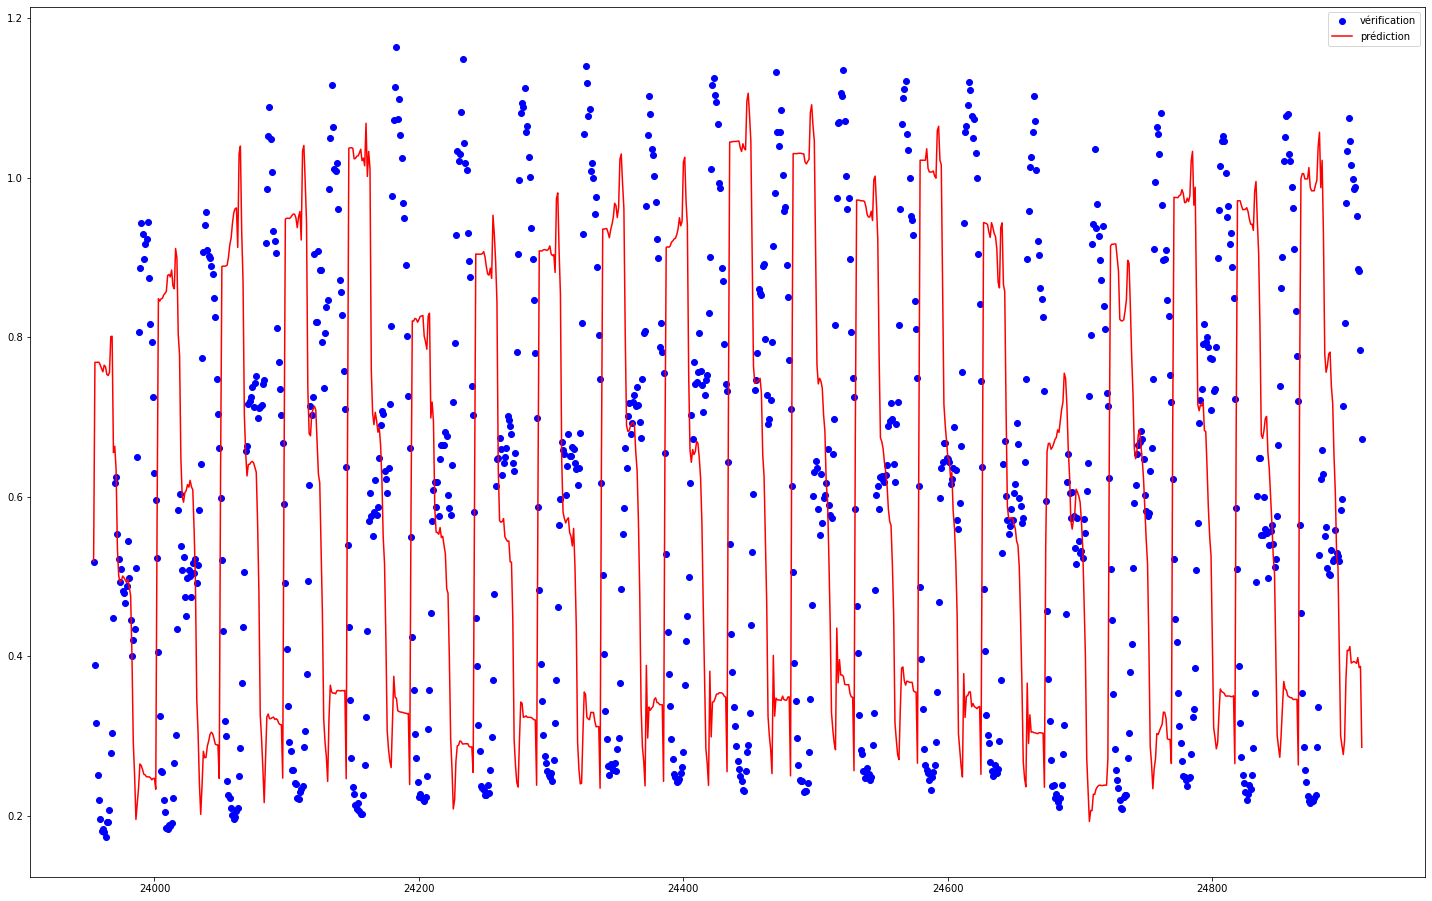

In [12]:
X, Y = get_raw_datas('données/Irish_synchrone_sample7_train', new=True, temps_cyclique=True)

# To have a better view of our results, we plot the last 2O days of our test datas
# for each model and we save the plots in the png files 
# "test_graphe_model_<model name>"
# The plot for the 'stackregr' is shown below.

for model_name in models:
    tracer_figure_20_dernier_jours(models[model_name], model_name, X, Y)

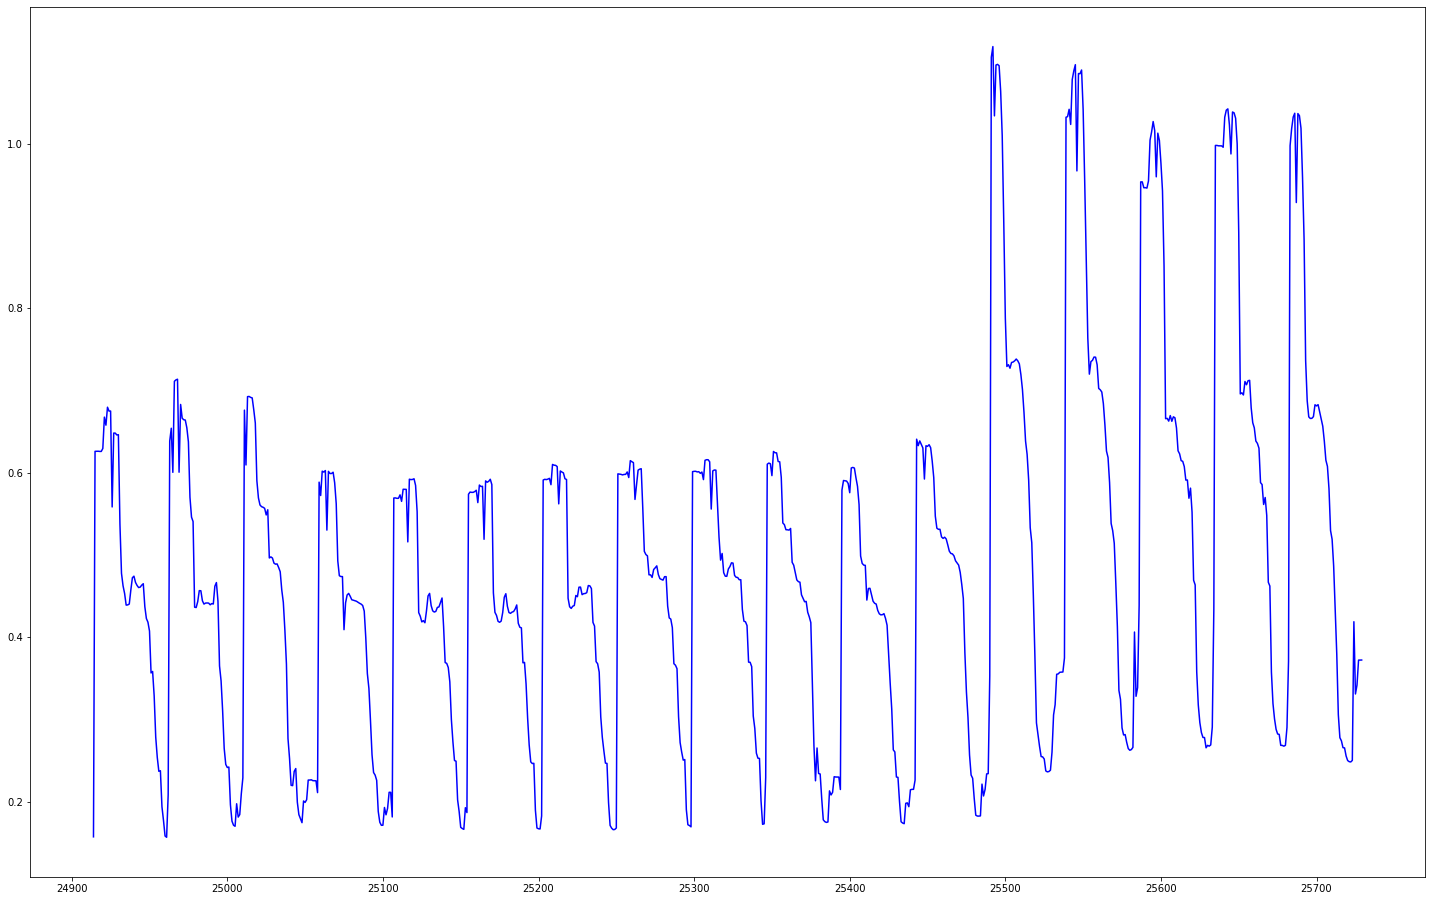

In [13]:
import numpy as np

X_to_predict = get_raw_datas('données/Irish_synchrone_sample7_to_predict_na', new=True)[0]

y_predicted = models['stackregr'].predict(pca_reduction(X_to_predict))


last_20_days = X_to_predict["Time"][-48*20:]
plt.cla()
plt.plot(X_to_predict["Time"], y_predicted, c="blue")
plt.gcf().set_size_inches(25, 16)

plt.savefig('resultat' + model_name + '.png')

np.savetxt("Prevision_Groupe7.csv", y_predicted, delimiter=" ")